## AirBnB NYC Data

### Melody Niere

Import libraries

In [2]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

In [3]:
nyc_df = pd.read_csv('listings.csv', low_memory = False)

In [4]:
#checking columns & data type
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39881 entries, 0 to 39880
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            39881 non-null  int64  
 1   listing_url                                   39881 non-null  object 
 2   scrape_id                                     39881 non-null  int64  
 3   last_scraped                                  39881 non-null  object 
 4   source                                        39881 non-null  object 
 5   name                                          39868 non-null  object 
 6   description                                   39036 non-null  object 
 7   neighborhood_overview                         23466 non-null  object 
 8   picture_url                                   39881 non-null  object 
 9   host_id                                       39881 non-null 

#### What is correlated with review scores?

In [5]:
#create a dateframe with reviews only
review_columns = nyc_df[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication','review_scores_location','review_scores_value']] 

In [6]:
#check to see if columns are all numeric values
review_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39881 entries, 0 to 39880
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review_scores_rating         31519 non-null  float64
 1   review_scores_accuracy       31056 non-null  float64
 2   review_scores_cleanliness    31066 non-null  float64
 3   review_scores_checkin        31052 non-null  float64
 4   review_scores_communication  31061 non-null  float64
 5   review_scores_location       31049 non-null  float64
 6   review_scores_value          31049 non-null  float64
dtypes: float64(7)
memory usage: 2.1 MB


In [7]:
#determine the correlation between the review score rating and the other ratings

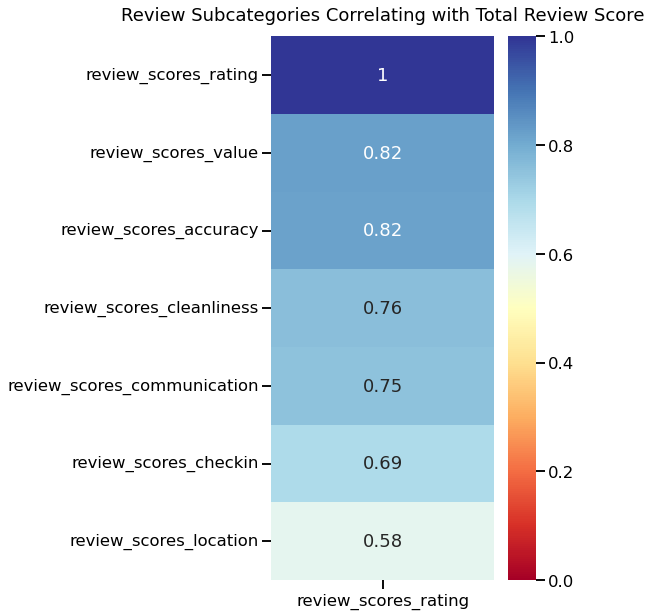

In [11]:
plt.figure(figsize=(5, 10))
sns.set_context("talk")
heatmap = sns.heatmap(review_columns.corr()[['review_scores_rating']].sort_values(by='review_scores_rating', ascending=False), vmin=0, vmax=1, annot=True, cmap='RdYlBu')
heatmap.set_title('Review Subcategories Correlating with Total Review Score', fontdict={'fontsize':18}, pad=16);
plt.savefig('review_correlation')

### What part of NYC to focus on?

In [15]:
#How many airbnb's are in each borough?
borough_df = nyc_df.groupby(['neighbourhood_group_cleansed'])['neighbourhood_group_cleansed'].count()
borough_df

neighbourhood_group_cleansed
Bronx             1568
Brooklyn         14845
Manhattan        16847
Queens            6175
Staten Island      446
Name: neighbourhood_group_cleansed, dtype: int64

#### Manhattan has the most airbnbs, so I'll focus on Manhattan!

In [18]:
# Create a dataframe with only Manhattan
manhattan_df = nyc_df[nyc_df["neighbourhood_group_cleansed"] == 'Manhattan']

In [20]:
manhattan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16847 entries, 1 to 39880
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            16847 non-null  int64  
 1   listing_url                                   16847 non-null  object 
 2   scrape_id                                     16847 non-null  int64  
 3   last_scraped                                  16847 non-null  object 
 4   source                                        16847 non-null  object 
 5   name                                          16839 non-null  object 
 6   description                                   16551 non-null  object 
 7   neighborhood_overview                         9386 non-null   object 
 8   picture_url                                   16847 non-null  object 
 9   host_id                                       16847 non-null 

### Manhattan Dataframe Cleaning

In [45]:
# manhattan dataframe has too much information
# create new dataframe with information I want

manhattan_df2 = manhattan_df[['host_id', 'host_name', 'neighbourhood_cleansed', 'property_type', 'bedrooms', 'beds', 'price', 'review_scores_rating', 
'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

manhattan_df2.head()

,host_id,host_name,neighbourhood_cleansed,property_type,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
1,2845,Jennifer,Midtown,Entire rental unit,NaN,1.0,$175.00,4.68,4.73,4.63,4.77,4.80,4.81,4.40
7,8967,Shunichi,Midtown,Private room in rental unit,1.0,1.0,$68.00,4.23,4.24,3.75,4.66,4.46,4.88,4.40
8,434987,Jennifer,East Village,Private room in rental unit,1.0,2.0,$55.00,4.34,4.44,3.88,4.84,4.76,4.82,4.45
11,867225,Rahul,Morningside Heights,Private room in bed and breakfast,1.0,1.0,$75.00,4.65,4.60,4.47,4.86,4.87,4.89,4.61
12,7490,MaryEllen,Upper West Side,Private room in rental unit,1.0,1.0,$75.00,4.91,4.83,4.82,4.97,4.95,4.94,4.92


In [30]:
manhattan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16847 entries, 1 to 39880
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_id                      16847 non-null  int64  
 1   host_name                    16802 non-null  object 
 2   neighbourhood_cleansed       16847 non-null  object 
 3   property_type                16847 non-null  object 
 4   bedrooms                     14315 non-null  float64
 5   beds                         16482 non-null  float64
 6   price                        16847 non-null  float64
 7   review_scores_rating         12731 non-null  float64
 8   review_scores_accuracy       12502 non-null  float64
 9   review_scores_cleanliness    12506 non-null  float64
 10  review_scores_checkin        12502 non-null  float64
 11  review_scores_communication  12505 non-null  float64
 12  review_scores_location       12500 non-null  float64
 13  review_scores_va

In [57]:
#turn price into a numeric but taking out the $

#function to clean into numeric
def clean_numeric(column_name):
    manhattan_df2[column_name] = manhattan_df2[column_name].str.extract('(\d+)', expand=False)
    manhattan_df2[column_name]  = manhattan_df2[column_name] .astype(float)

#clean_numeric('price') 
#commented out when done

In [58]:
manhattan_df2.head()

,host_id,host_name,neighbourhood_cleansed,property_type,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
1,2845,Jennifer,Midtown,Entire rental unit,NaN,1.0,$175.00,4.68,4.73,4.63,4.77,4.80,4.81,4.40
7,8967,Shunichi,Midtown,Private room in rental unit,1.0,1.0,$68.00,4.23,4.24,3.75,4.66,4.46,4.88,4.40
8,434987,Jennifer,East Village,Private room in rental unit,1.0,2.0,$55.00,4.34,4.44,3.88,4.84,4.76,4.82,4.45
11,867225,Rahul,Morningside Heights,Private room in bed and breakfast,1.0,1.0,$75.00,4.65,4.60,4.47,4.86,4.87,4.89,4.61
12,7490,MaryEllen,Upper West Side,Private room in rental unit,1.0,1.0,$75.00,4.91,4.83,4.82,4.97,4.95,4.94,4.92


In [59]:
#renaming columns
manhattan_df2.rename(columns = 
                     {'neighbourhood_cleansed':'neighborhood', 
                      'review_scores_rating':'review_score', 
                      'review_scores_accuracy':'accuracy_score', 
                      'review_scores_cleanliness':'cleanliness_score',
                      'review_scores_checkin':'checkin_score',
                      'review_scores_communication':'communication_score',
                      'review_scores_location':'location_score',
                      'review_scores_value':'value_score'},inplace = True)


C:\Users\Mel\AppData\Local\Temp\ipykernel_3192\2670204706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manhattan_df2.rename(columns =


In [60]:
manhattan_df2.head()

,host_id,host_name,neighborhood,property_type,bedrooms,beds,price,review_score,accuracy_score,cleanliness_score,checkin_score,communication_score,location_score,value_score
1,2845,Jennifer,Midtown,Entire rental unit,NaN,1.0,$175.00,4.68,4.73,4.63,4.77,4.80,4.81,4.40
7,8967,Shunichi,Midtown,Private room in rental unit,1.0,1.0,$68.00,4.23,4.24,3.75,4.66,4.46,4.88,4.40
8,434987,Jennifer,East Village,Private room in rental unit,1.0,2.0,$55.00,4.34,4.44,3.88,4.84,4.76,4.82,4.45
11,867225,Rahul,Morningside Heights,Private room in bed and breakfast,1.0,1.0,$75.00,4.65,4.60,4.47,4.86,4.87,4.89,4.61
12,7490,MaryEllen,Upper West Side,Private room in rental unit,1.0,1.0,$75.00,4.91,4.83,4.82,4.97,4.95,4.94,4.92


In [72]:
neighborhood_df['num_rentals'] = manhattan_df2.groupby('neighborhood')['neighborhood'].transform('count')
print(neighborhood_df)

neighborhood
Battery Park City                                                     87
Central Park                                                          66
Chelsea                                                              901
Chinatown                                                            237
Civic Center                                                          30
East Harlem                                                          768
East Village                                                        1057
Ellis Island                                                          79
Financial District                                                   482
Flatiron District                                                     98
Gramercy                                                             227
Greenwich Village                                                    206
Harlem                                                              1878
Hell's Kitchen                        

In [73]:
neighborhood_df.info()

<class 'pandas.core.series.Series'>
Index: 35 entries, Battery Park City to num_rentals
Series name: neighborhood
Non-Null Count  Dtype 
--------------  ----- 
35 non-null     object
dtypes: object(1)
memory usage: 1.6+ KB


## Creating a Dataframe to use in Tableau

In [44]:
manhattan_df3 = manhattan_df[['host_id', 'host_name', 'neighbourhood_cleansed', 'property_type', 'bedrooms', 'beds', 'price', 'review_scores_rating', 
'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'latitude', 'longitude']]

In [46]:
manhattan_df3.rename(columns = 
                     {'neighbourhood_cleansed':'neighborhood', 
                      'review_scores_rating':'review_score', 
                      'review_scores_accuracy':'accuracy_score', 
                      'review_scores_cleanliness':'cleanliness_score',
                      'review_scores_checkin':'checkin_score',
                      'review_scores_communication':'communication_score',
                      'review_scores_location':'location_score',
                      'review_scores_value':'value_score'},inplace = True)

C:\Users\Mel\AppData\Local\Temp\ipykernel_3192\2327921510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manhattan_df3.rename(columns =


In [75]:
#make price into numeric
manhattan_df3['price'] = manhattan_df3['price'].str.extract('(\d+)', expand=False)
manhattan_df3['price']  = manhattan_df3['price'] .astype(float)

C:\Users\Mel\AppData\Local\Temp\ipykernel_3192\3304030573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manhattan_df3['price'] = manhattan_df3['price'].str.extract('(\d+)', expand=False)
C:\Users\Mel\AppData\Local\Temp\ipykernel_3192\3304030573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manhattan_df3['price']  = manhattan_df3['price'] .astype(float)


In [76]:
manhattan_df3

,host_id,host_name,neighborhood,property_type,bedrooms,beds,price,review_score,accuracy_score,cleanliness_score,checkin_score,communication_score,location_score,value_score,latitude,longitude
1,2845,Jennifer,Midtown,Entire rental unit,NaN,1.0,175.0,4.68,4.73,4.63,4.77,4.80,4.81,4.40,40.753560,-73.985590
7,8967,Shunichi,Midtown,Private room in rental unit,1.0,1.0,68.0,4.23,4.24,3.75,4.66,4.46,4.88,4.40,40.764570,-73.983170
8,434987,Jennifer,East Village,Private room in rental unit,1.0,2.0,55.0,4.34,4.44,3.88,4.84,4.76,4.82,4.45,40.723220,-73.986150
11,867225,Rahul,Morningside Heights,Private room in bed and breakfast,1.0,1.0,75.0,4.65,4.60,4.47,4.86,4.87,4.89,4.61,40.806300,-73.959850
12,7490,MaryEllen,Upper West Side,Private room in rental unit,1.0,1.0,75.0,4.91,4.83,4.82,4.97,4.95,4.94,4.92,40.803800,-73.967510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39873,40898359,Michele,West Village,Private room in rental unit,2.0,2.0,150.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,40.739967,-74.031677
39874,40898359,Michele,West Village,Private room in rental unit,1.0,1.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.738800,-74.030900
39875,40898359,Michele,West Village,Private room in rental unit,1.0,1.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.738800,-74.030940
39877,48009648,Nathan,Upper West Side,Entire rental unit,1.0,2.0,108.0,4.79,4.92,4.75,5.00,4.96,4.81,4.85,40.784590,-74.012530


In [77]:
manhattan_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16847 entries, 1 to 39880
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   host_id              16847 non-null  int64  
 1   host_name            16802 non-null  object 
 2   neighborhood         16847 non-null  object 
 3   property_type        16847 non-null  object 
 4   bedrooms             14315 non-null  float64
 5   beds                 16482 non-null  float64
 6   price                16847 non-null  float64
 7   review_score         12731 non-null  float64
 8   accuracy_score       12502 non-null  float64
 9   cleanliness_score    12506 non-null  float64
 10  checkin_score        12502 non-null  float64
 11  communication_score  12505 non-null  float64
 12  location_score       12500 non-null  float64
 13  value_score          12500 non-null  float64
 14  latitude             16847 non-null  float64
 15  longitude            16847 non-null 

In [78]:
manhattan_df3.to_csv('airbnb_manhattan.csv')

In [5]:
dirty_df.to_csv('Dirty_Comment.csv')

In [3]:
dirty_df = pd.read_csv('Dirty_Comment.csv', low_memory = False)

In [4]:
dirty_df['review_scores_cleanliness'] = dirty_df['review_scores_cleanliness'].str.extract('(\d+)', expand=False)
dirty_df['review_scores_cleanliness']  = dirty_df['review_scores_cleanliness'].astype(float)